# K-Means Clustering



Given data $x_1, x_2, x_3 ...x_n$ we partition into groups or clusters such that elements in the same cluster share similarities. K-means is the most fundamental clustering algorithm among clustering methods. 

** Input: **
$x_1, x_2, x_3, ...x_n$ where $x\in R^d$

** Output **
Vectors c and $\mu$ of cluster assignments and Cluster Centroids respectively.

K- Means objective function is to assign cluster centroids such that the sum of square eucledian ditances of the data points from their respective centroids is minimized. Mathematically this can be exrpressed in the following manner

\begin{equation}
\mu^{*}, c^{*} = arg \ \underset{\mu, c}{min} \sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{1}(c_i = k) \left \Vert x_i - \mu_{k} \right \Vert^2
\end{equation}

where $c_i$ is the cluster assignment and $\mu_k$ is the centroid vector of the $k^{th}$ cluster.


The objective function is optimized using the **coordinate decent** algorithm. In this approach we fix one set of parameters and optimize the other. Then switch sets. In the case of K-means clustering we have:

1. Given $\mu$, find the best value $ c_i \in {1,...,K}$ for $ i = 1, ...,n$.
2. Given **c**, find the best value $\mu_k \in R^{d}$ for $ k = 1,...,K$.






In [3]:
import numpy as np
import numpy.linalg as nplg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
# Generate Gaussian Samples 

models = np.array([1,2,3])
weights = np.array([0.2,0.5,0.3])

mean1 = np.array([0,0])
cov1 = np.array([[1,0],[0,1]])

mean2 = np.array([3,0])
cov2 = np.array([[1,0],[0,1]])

mean3 = np.array([0,3])
cov3 = np.array([[1,0],[0,1]])

samples = []

for i in range(500):
    
    select = np.random.choice(models,p=weights)    
    if select == 1:
        samples.append(np.random.multivariate_normal(mean1, cov1))
    if select == 2:
        samples.append(np.random.multivariate_normal(mean2, cov2))
    if select == 3:
        samples.append(np.random.multivariate_normal(mean3, cov3))



##  For K = 2; 3; 4; 5, we plot the value of the K-means objective function per iteration for 20 iterations

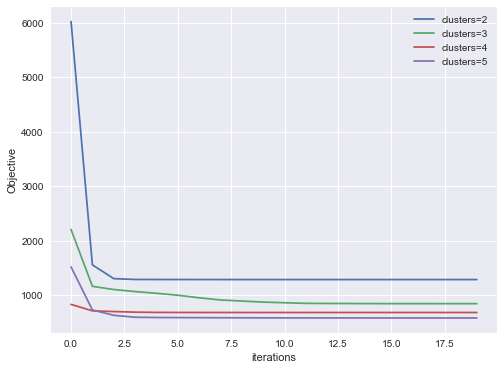

In [5]:
samples = np.array(samples)
K = range(2,6)
obj_all_k = []
centroids_k = []
final_clusters = []
plt.figure(figsize=(8,6))
for k in K:
    
    # Initialize centroids
    index = np.random.choice(range(500),k)
    centroids = samples[index]

    # Intialize clusters array
    c = np.zeros(500)
    obj_all=[]
    
    # Start Iterations
    for iteration in range(20):
        for i in range(500):
            norm=[]
            for cent in centroids:
                dist = (nplg.norm(samples[i]-cent,ord=2))**2
                norm.append(dist)

            norm=np.array(norm)
            cluster = np.argmin(norm)
            c[i]=cluster

    # Calculate objective function
        obj = 0
        for m in range(len(centroids)):
            diff = samples[np.where(c==m)] - np.repeat([centroids[m]],samples[np.where(c==m)].shape[0],axis=0)
            obj_cluster = np.sum(nplg.norm(diff,ord=2,axis=1)**2)
            obj = obj + obj_cluster

        obj_all.append(obj)

    # Re-calculate Centroids
        for j in range(len(centroids)):
            centroids[j] = np.sum(samples[np.where(c==j)],axis=0)/samples[np.where(c==j)].shape[0]
            
    final_clusters.append(c)
    centroids_k.append(centroids)  
    

    plt.plot(range(20),obj_all,label='clusters='+str(k))
    plt.xlabel("iterations")
    plt.ylabel("Objective")
    plt.legend()

## For K = 3; 5, plot the 500 data points and indicate the cluster of each for the final iteration by marking it with a color or a symbol.

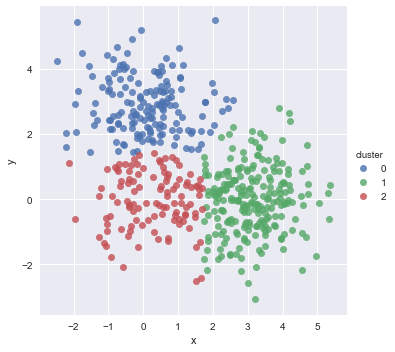

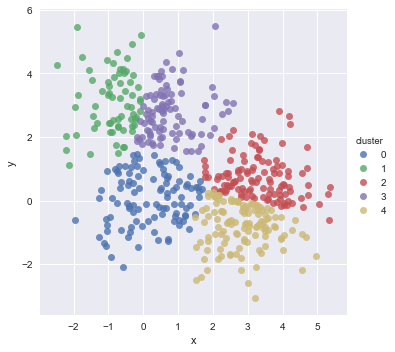

In [6]:

# clusters_3 = pd.DataFrame(samples)
clusters_3 = pd.DataFrame(np.concatenate((samples,np.transpose(np.matrix(final_clusters[1]))),1),columns=['x','y','cluster'])
clusters_3['cluster'] = clusters_3.cluster.astype('int').astype('category')

clusters_5 = pd.DataFrame(np.concatenate((samples,np.transpose(np.matrix(final_clusters[3]))),1),columns=['x','y','cluster'])
clusters_5['cluster'] = clusters_5.cluster.astype('int').astype('category')

_=sns.lmplot('x', 'y', data=clusters_3, hue='cluster', fit_reg=False)
_=sns.lmplot('x', 'y', data=clusters_5, hue='cluster', fit_reg=False)


